# 회귀분석 286P

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## step1
### 자료설명
- 1970년대 후반부터 1980년데 전반까지의 자동차 연비 예측을 수행합니다.
- 칼럼명을 보면, MPG는 miles per gallon이고, displacement는 이동거리, Horsepower는 마력이 되겠다. 마지막에 Origin은 엔진을 만든 국가를 나타낸다. 1은 USA, 2는 Europe, 그리고 3은 Japan이다. 이것은 preprocessing 과정에서 원 핫 형태로 변형시킬 것이다. 

In [2]:
df = pd.read_csv('data/part7/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## step2

In [7]:
df['horsepower'].unique()       #고유값 확인

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
df['horsepower'].replace('?', np.nan, inplace=True) #? 값 nan으로 변경, 추후 이상치 값을 dropna로 한번에 제거하기 위함.
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)
print(df['horsepower'].unique())
print(df.info())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '100.0' '105.0' '175.0' '153.0' '180.0'
 '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00' '80.00'
 '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0' '167.0'
 '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00' '83.00'
 '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00' '98.00'
 '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0' '68.00'
 '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0' '125.0'
 '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00' '64.00'
 '74.00' '116.0' '82.00']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylind

In [11]:
df['horsepower'] = df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [14]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


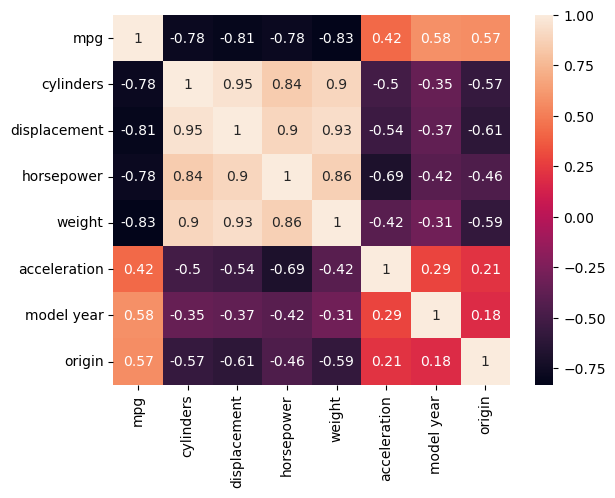

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

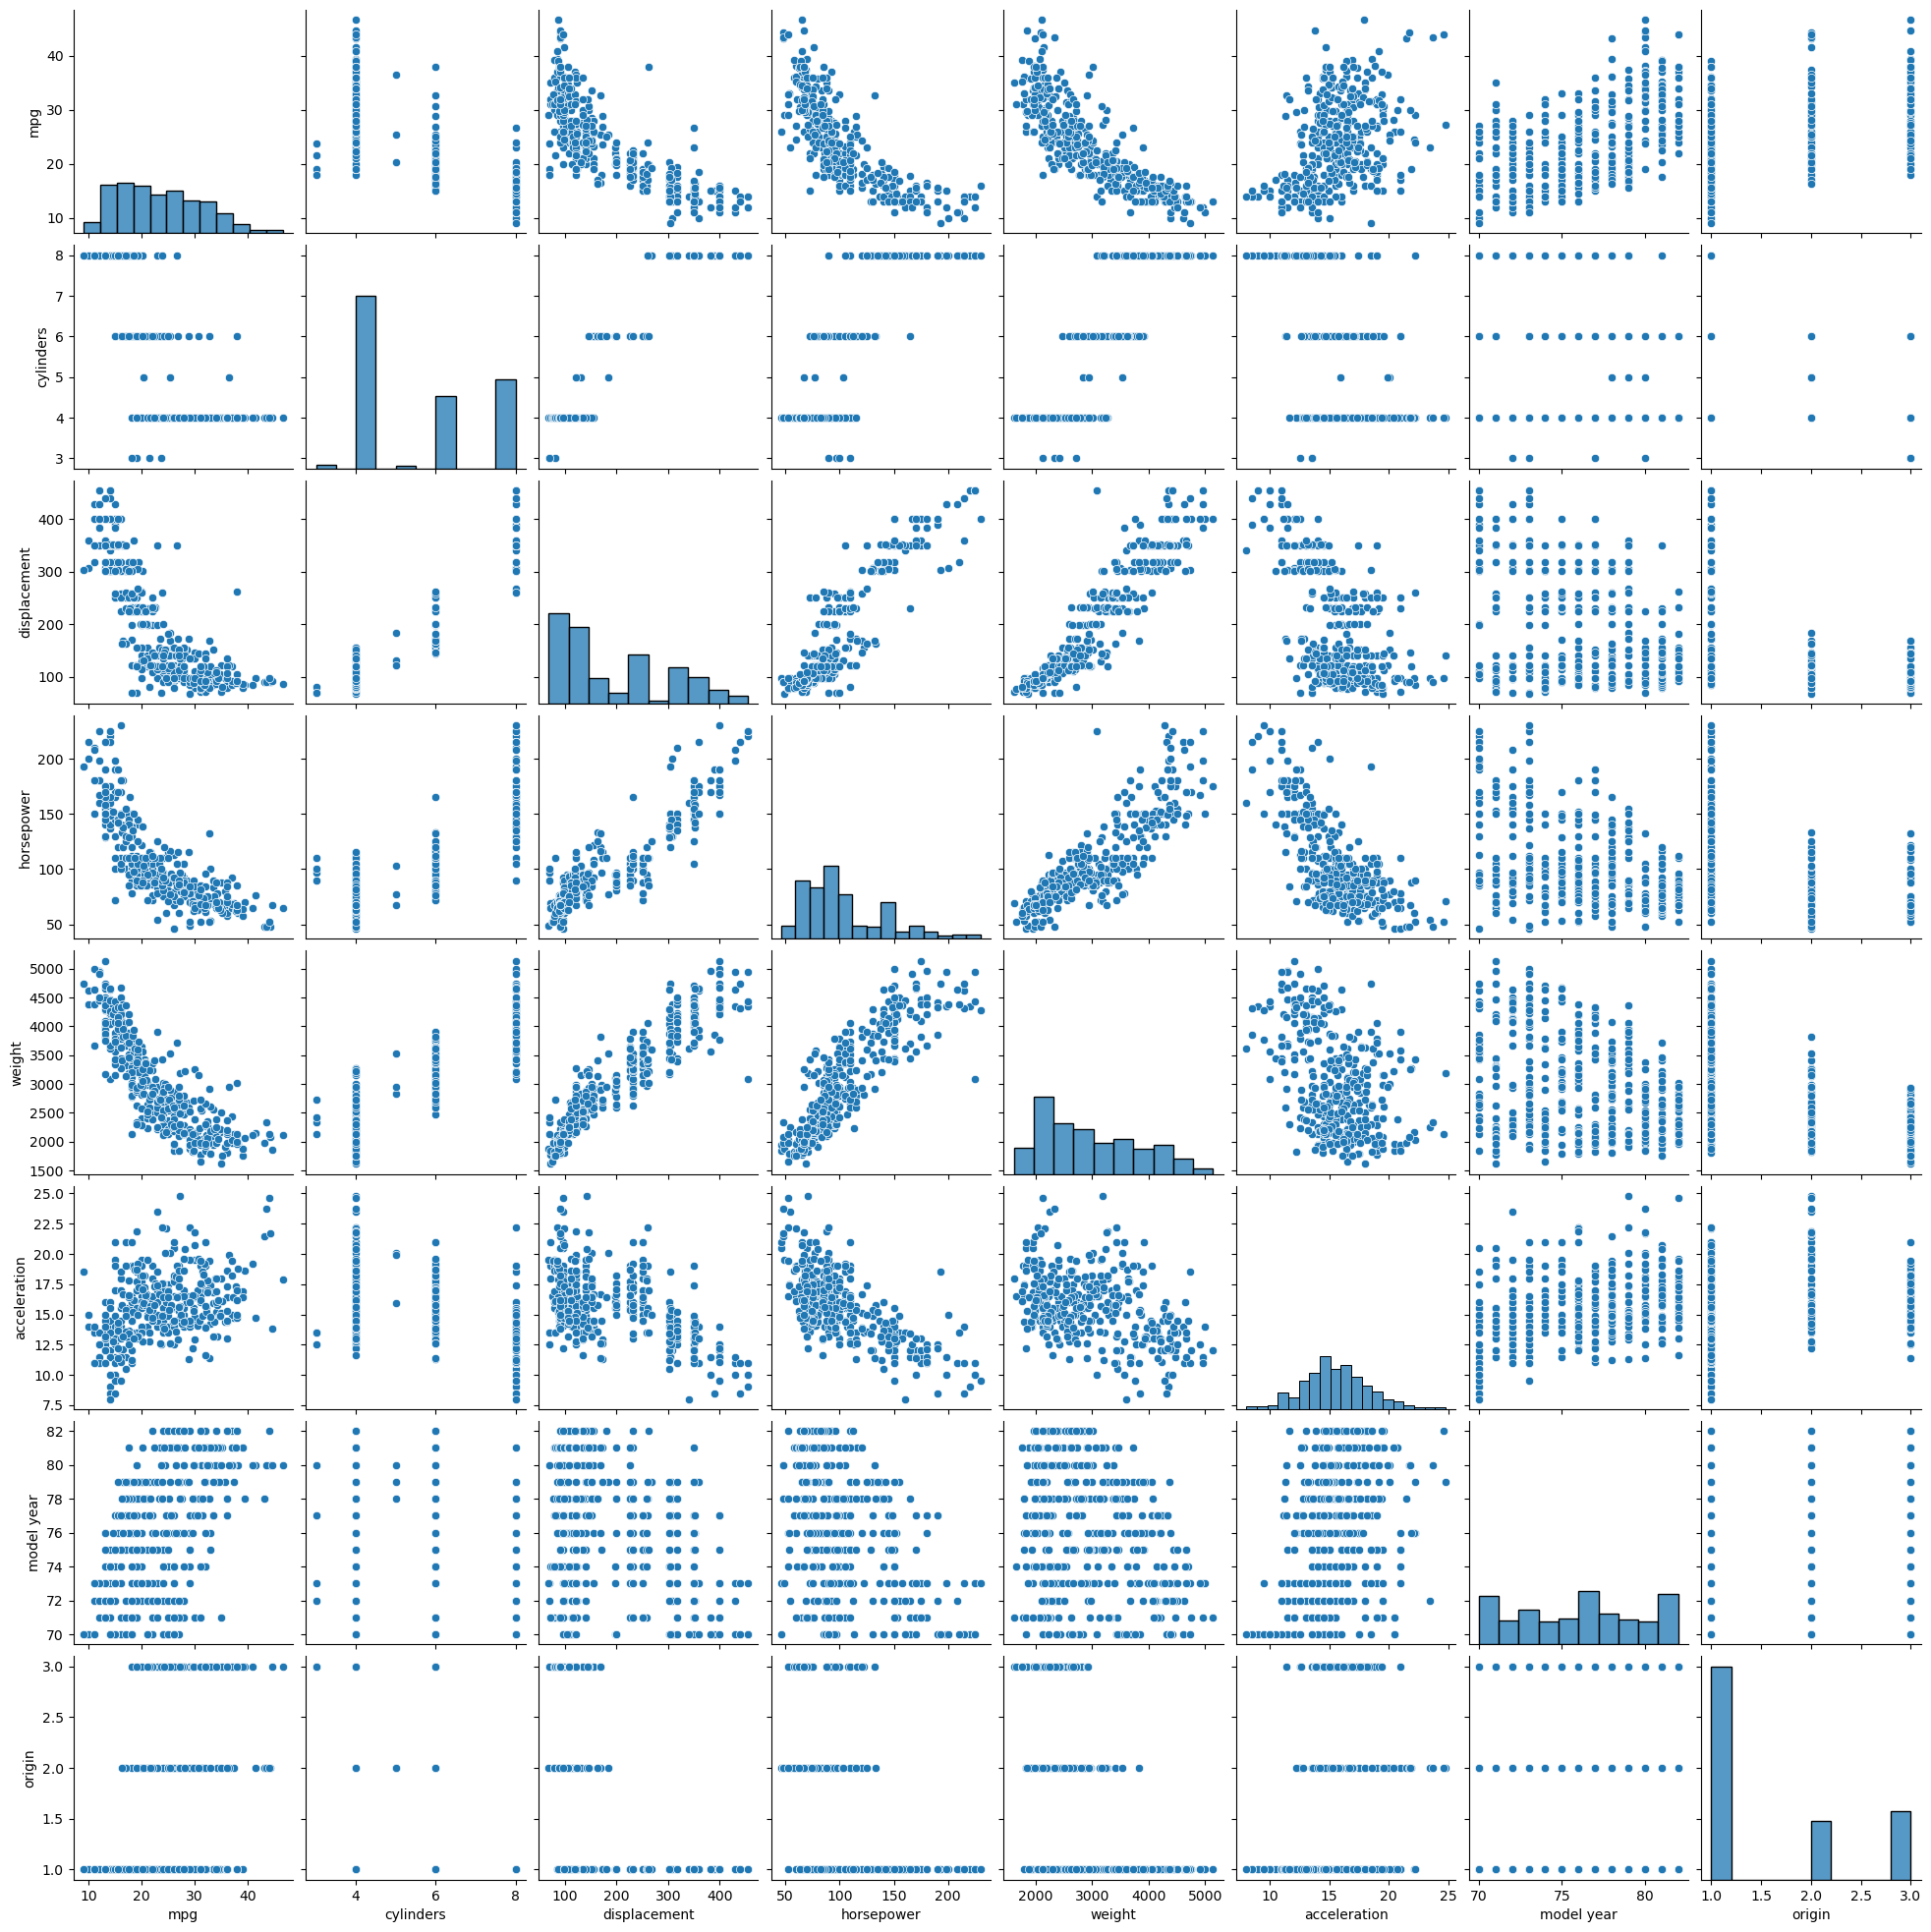

In [26]:
sns.pairplot(df)
plt.show()

## step3 속성(feature 또는 variable) 선택
- y값(종속변수, 레이블)
- x값(독립변수, 특징값)

In [13]:
ndf = df[['mpg', 'cylinders','horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


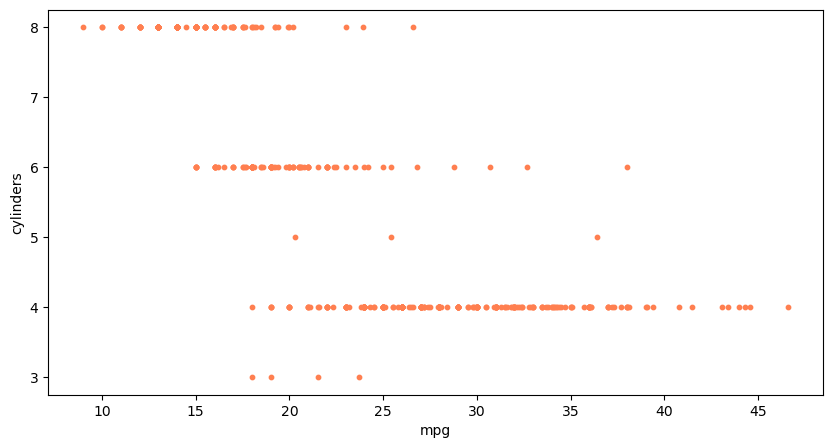

In [23]:
ndf.plot(kind='scatter', x='mpg', y='cylinders', c='coral', s=10, figsize=(10,5))
plt.show()

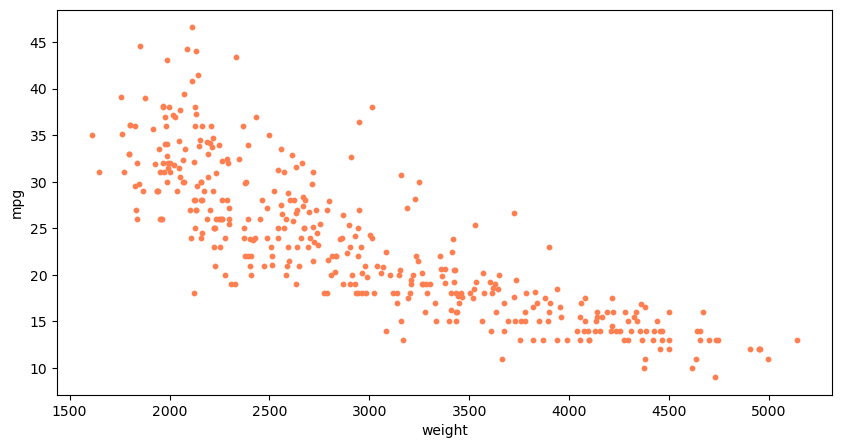

In [19]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

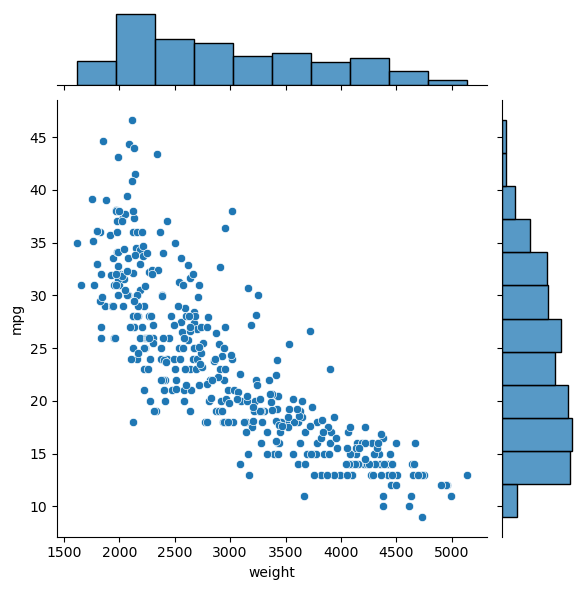

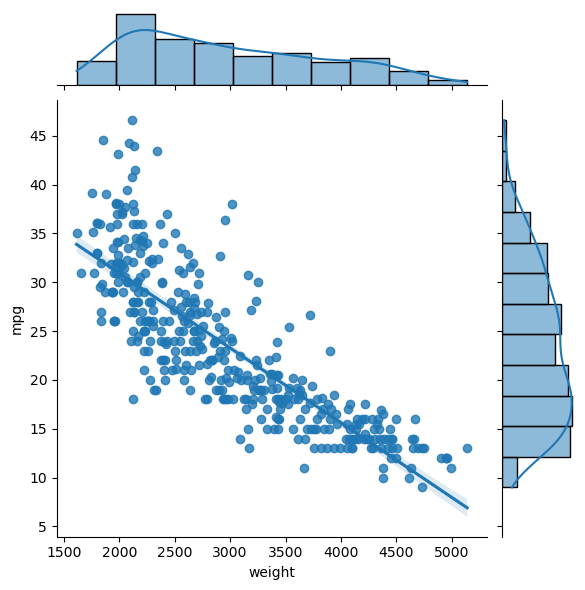

In [24]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) #회귀선 없음
plt.show()

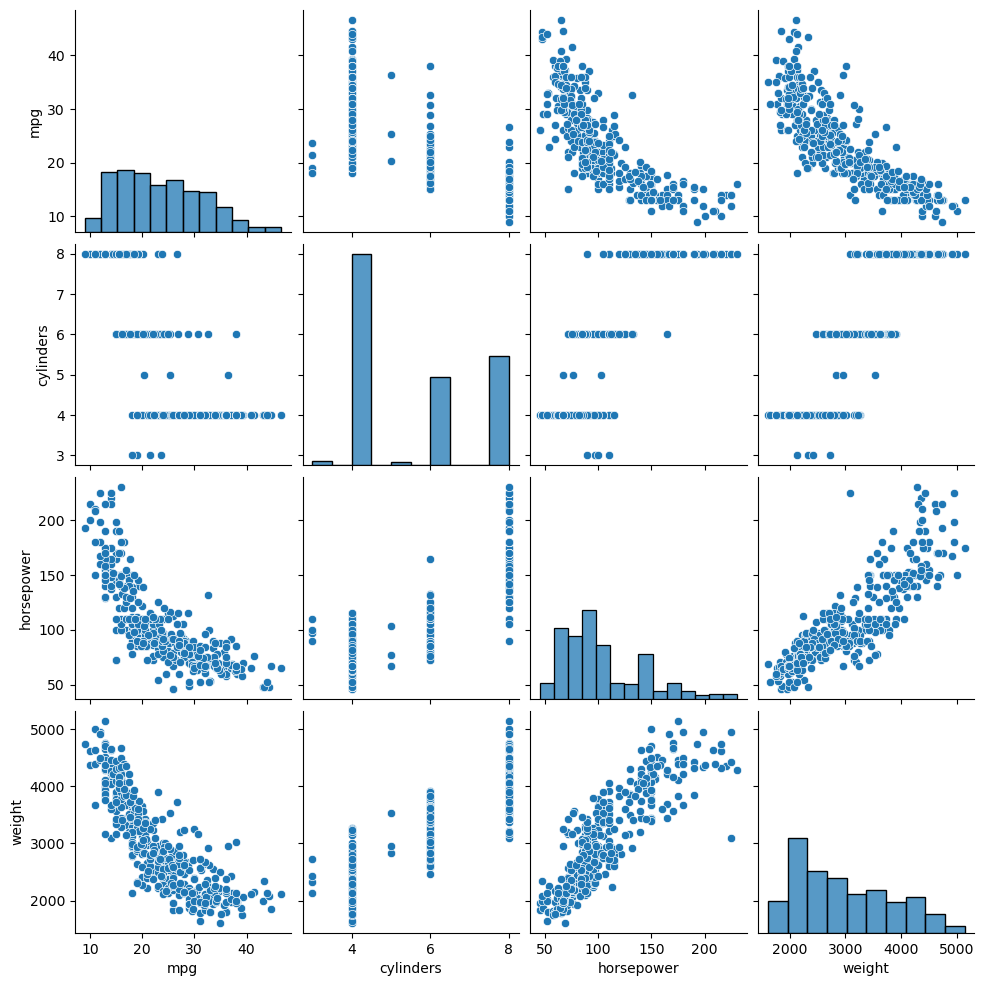

In [25]:
sns.pairplot(ndf)
plt.show()

# step4 훈련 검증 데이터 분할

In [63]:
X = ndf[['weight']] # 독립변수 X
y = ndf['mpg']      # 종속변수 y

#train data 와 test data로 구분 7:3 비율
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # 독립변수
    y,                  # 종속변수
    test_size=0.3,      # 검증 30%
    random_state=10     # 랜덤 추출 값
)

In [48]:
len(X)

392

In [49]:
len(X_train)

274

In [50]:
len(X_test)

118

In [51]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(274, 1) (118, 1)
(274,) (118,)


# step5 모형 학습 및 검증

In [64]:
from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈

lr = LinearRegression()

lr.fit(X_train, y_train)    # train data로 학습

lr.score(X_train, y_train), lr.score(X_test, y_test)


(0.6916618001977128, 0.6822458558299325)

In [55]:

r_square = lr.score(X_test, y_test)
r_square

0.6822458558299325

In [32]:
# 단순 회귀분석
f'기울기 a: {lr.coef_}'

'기울기 a: [-0.00775343]'

In [33]:
f'y절편 b:{lr.intercept_}'

'y절편 b:46.710366257280086'

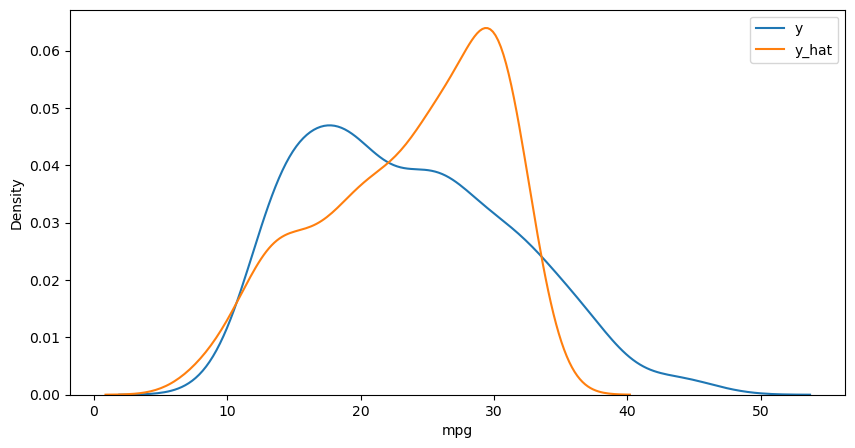

In [35]:
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

- 출력결과는 실제값은 왼쪽 편향, 예측값은 오른쪽 편향
- 독립변수 weight 와 종속 변수 mpg 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있음
- 산점도를 보면 직선보다 곡선의 형태가 더 적합해 보여, 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있음

- 단순회귀 : X값이 1개 인 것
- 다중회귀 : X값이 2개 이상인 것
- 다항회귀 : 차수를 추가해 맞춤

# 다중회귀분석 305P

In [66]:
from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈

lr = LinearRegression()

lr.fit(X_train, y_train)    # train data로 학습


r_square = lr.score(X_test, y_test)

print (r_square)
print(lr.coef_)
print(lr.intercept_)

0.6822458558299325
[-0.00775343]
46.710366257280086


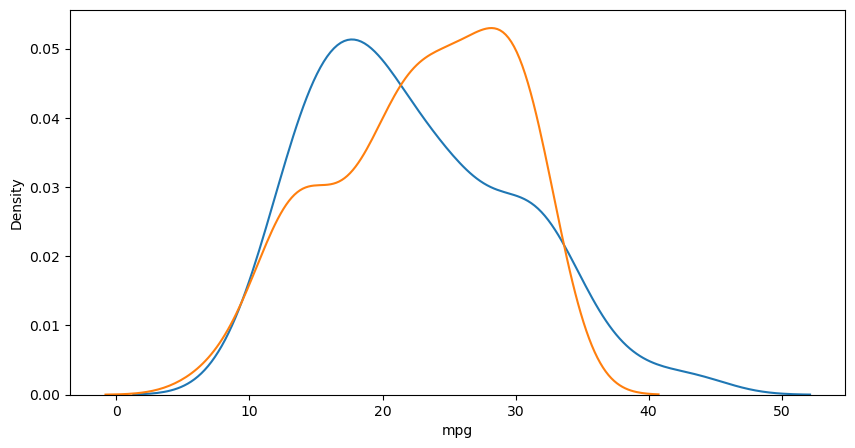

In [72]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
#plt.legend()
plt.show()